<a href="https://colab.research.google.com/github/christina3099/Cats-Vs-Dogs-CNN/blob/main/CatsVsDogs_VGG16_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)


In [4]:
train_generator = train_datagen.flow_from_directory(
    path + '/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [5]:
test_generator = test_datagen.flow_from_directory(
    path + '/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 5000 images belonging to 2 classes.


In [7]:
from tensorflow.keras.models import Sequential

In [8]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
from tensorflow.keras.layers import Dense, Flatten

In [12]:
model = Sequential([
  conv_base,
  Flatten(),
  Dense(256, activation='relu'),
  Dense(1, activation='sigmoid')
])

conv_base.trainable = False

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=2
)

In [19]:
history = model.fit(
      train_generator,
      epochs=10,
      validation_data = test_generator,
      callbacks =[early_stopping])

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9301 - loss: 0.1710 - val_accuracy: 0.9088 - val_loss: 0.2140
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.9427 - loss: 0.1421 - val_accuracy: 0.9124 - val_loss: 0.2063
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.9535 - loss: 0.1167 - val_accuracy: 0.9086 - val_loss: 0.2424
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9625 - loss: 0.0889 - val_accuracy: 0.9100 - val_loss: 0.2391


In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/microsoft-catsvsdogs-dataset


In [23]:
test_dir = path + '/PetImages'

In [24]:
import os
data = []
for label in ["Cat","Dog"]:
    for file in os.listdir(os.path.join(test_dir,label)):
        data.append([os.path.join(test_dir,label,file),label])

In [26]:
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def is_valid_image(path):
    try:
        img = Image.open(path)
        img.verify()
        return True
    except Exception:
        return False

# Convert the list to a DataFrame
data_df = pd.DataFrame(data, columns=['image', 'label'])

# Apply the filter to the DataFrame
test_df_cleaned = data_df[data_df['image'].apply(is_valid_image)].copy()

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [29]:
test_data = ImageDataGenerator(rescale= 1./255)

test_generator = test_data.flow_from_dataframe(
    test_df_cleaned,
    x_col='image',
    y_col='label',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 24998 validated image filenames belonging to 2 classes.


In [30]:
y_prob = model.predict(test_generator)
y_classes = y_prob.argmax(axis=-1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 148/1250 ━━━━━━━━━━━━━━━━━━━━ 1:12 65ms/step

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 69ms/step


In [31]:
from sklearn.metrics import accuracy_score

In [35]:
import numpy as np

# Convert probabilities to labels for the whole array
def get_labels(y_prob):
    """
    Convert predicted probabilities into class labels.
    Assumes binary classification: Cat=0, Dog=1
    """
    return np.where(y_prob > 0.5, 1, 0)  # threshold at 0.5

# Predicted labels (numerical)
y_pred = get_labels(y_classes)

# True labels from the generator
y_true = test_generator.classes

# Calculate accuracy
acc = accuracy_score(y_true, y_pred)

# Display results
print(f"Accuracy on the test set: {acc * 100:.2f}%")


Accuracy on the test set: 50.00%


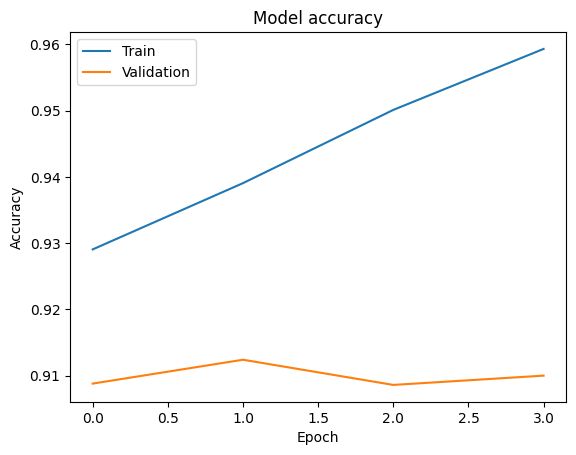

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')